In [ ]:
import pandas as pd

covid_df = pd.read_csv("/Users/apple/Downloads/Covid_19/covid.csv")
ed_df = pd.read_csv("/Users/apple/Downloads/Covid_19/ED.csv", low_memory=False)

covid_head = covid_df.head()
ed_head = ed_df.head()

covid_info = covid_df.describe(include='all').T
ed_info = ed_df.describe(include='all').T

covid_shape = covid_df.shape
ed_shape = ed_df.shape

covid_df.columns.tolist(), ed_df.columns.tolist(), covid_shape, ed_shape

/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_6339/1814825684.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ed_df = pd.read_csv("/Users/apple/Downloads/Covid_19/ED.csv")


(['iso_code',
  'continent',
  'location',
  'date',
  'total_cases',
  'new_cases',
  'new_cases_smoothed',
  'total_deaths',
  'new_deaths',
  'new_deaths_smoothed',
  'total_cases_per_million',
  'new_cases_per_million',
  'new_cases_smoothed_per_million',
  'total_deaths_per_million',
  'new_deaths_per_million',
  'new_deaths_smoothed_per_million',
  'reproduction_rate',
  'icu_patients',
  'icu_patients_per_million',
  'hosp_patients',
  'hosp_patients_per_million',
  'weekly_icu_admissions',
  'weekly_icu_admissions_per_million',
  'weekly_hosp_admissions',
  'weekly_hosp_admissions_per_million',
  'total_tests',
  'new_tests',
  'total_tests_per_thousand',
  'new_tests_per_thousand',
  'new_tests_smoothed',
  'new_tests_smoothed_per_thousand',
  'positive_rate',
  'tests_per_case',
  'tests_units',
  'total_vaccinations',
  'people_vaccinated',
  'people_fully_vaccinated',
  'total_boosters',
  'new_vaccinations',
  'new_vaccinations_smoothed',
  'total_vaccinations_per_hundred'

In [3]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
ed_df.head()

,COUNTRY,Country,WEEK,Week number,GENDER,Gender,AGE,Age,VARIABLE,Variable,YEAR,Year,Value,Flag Codes,Flags
0,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2020,2020,2.2,NaN,NaN
1,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2021,2021,8.2,NaN,NaN
2,CZE,Czechia,46,46,TOTAL,Total,Y0T44,0 to 44,EXCESSNB,Excess deaths (number),2022,2022,4.2,NaN,NaN
3,NLD,Netherlands,3,3,TOTAL,Total,Y_GE65,65 and over,EXCESSNB,Excess deaths (number),2020,2020,-127.4,NaN,NaN
4,NLD,Netherlands,3,3,TOTAL,Total,Y_GE65,65 and over,EXCESSNB,Excess deaths (number),2021,2021,569.6,NaN,NaN


In [15]:
covid = covid_df.copy()
ed = ed_df.copy()

# Clean ED column names: lowercase, replace spaces/dashes with "_"
ed.columns = (
    ed.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Handle duplicate columns - create a new column list with unique names
new_columns = []
column_counts = {}
for col in ed.columns:
    if col not in column_counts:
        column_counts[col] = 0
        new_columns.append(col)
    else:
        column_counts[col] += 1
        new_columns.append(f"{col}_{column_counts[col]}")

ed.columns = new_columns

print("ED columns after cleaning (duplicates handled):")
print(ed.columns.tolist())

ED columns after cleaning (duplicates handled):
['country', 'country_1', 'week', 'week_number', 'gender', 'gender_1', 'age', 'age_1', 'variable', 'variable_1', 'year', 'year_1', 'value', 'flag_codes', 'flags']


In [ ]:
# Select first occurrence of each column (duplicates are now named country, country_1, etc.)
ed_subset = ed[["country", "year", "week_number", "value"]].copy()

print("Columns in ed_subset:", ed_subset.columns.tolist())
print("\nData types:")
print(ed_subset.dtypes)
print("\nFirst few rows:")
ed_subset.head()

Columns in ed_subset: ['country', 'year', 'week_number', 'value']

Data types:
country         object
year             int64
week_number      int64
value          float64
dtype: object


,country,year,week_number,value
0,CZE,2020,46,2.2
1,CZE,2021,46,8.2
2,CZE,2022,46,4.2
3,NLD,2020,3,-127.4
4,NLD,2021,3,569.6


In [17]:
# Rename week_number to weekofyear for clarity
ed_subset = ed_subset.rename(columns={
    "week_number": "weekofyear"
})

# Convert year/week to numeric
ed_subset["year"] = pd.to_numeric(ed_subset["year"], errors="coerce")
ed_subset["weekofyear"] = pd.to_numeric(ed_subset["weekofyear"], errors="coerce")

# Create ISO week string, e.g. "2020-W05-1" → Monday of that week
iso_str = (
    ed_subset["year"].astype("Int64").astype(str)
    + "-W"
    + ed_subset["weekofyear"].astype("Int64").astype(str).str.zfill(2)
    + "-1"
)
ed_subset["date"] = pd.to_datetime(iso_str, format="%G-W%V-%u", errors="coerce")

# Check result
ed_subset.head()


,country,year,weekofyear,value,date
0,CZE,2020,46,2.2,2020-11-09
1,CZE,2021,46,8.2,2021-11-15
2,CZE,2022,46,4.2,2022-11-14
3,NLD,2020,3,-127.4,2020-01-13
4,NLD,2021,3,569.6,2021-01-18


In [18]:
covid_clean = covid_df.copy()


covid_clean = covid_clean.rename(columns={"location": "country"})

covid_clean["date"] = pd.to_datetime(covid_clean["date"], errors="coerce")


covid_countries = sorted(covid_clean["country"].dropna().unique().tolist())
ed_countries = sorted(ed_subset["country"].dropna().unique().tolist())

common_countries = sorted(list(set(covid_countries).intersection(set(ed_countries))))

print("Number of COVID countries:", len(covid_countries))
print("Number of ED countries:", len(ed_countries))
print("Common countries (first 20):", common_countries[:20])


Number of COVID countries: 255
Number of ED countries: 34
Common countries (first 20): []


In [ ]:
ed_subset["country"].unique()[:40]

array(['CZE', 'NLD', 'SWE', 'POL', 'FIN', 'LTU', 'AUS', 'NOR', 'SVN',
       'CHL', 'FRA', 'ESP', 'CAN', 'ISL', 'GRC', 'ITA', 'HUN', 'DNK',
       'GBR', 'CHE', 'LUX', 'AUT', 'LVA', 'EST', 'ISR', 'DEU', 'BEL',
       'PRT', 'USA', 'SVK', 'NZL', 'COL', 'MEX', 'CRI'], dtype=object)

In [20]:
covid_countries = sorted(covid_clean["country"].dropna().unique().tolist())
ed_countries   = sorted(ed_subset["country"].dropna().unique().tolist())

print("Sample COVID countries:", covid_countries[:20])
print("Sample ED countries:", ed_countries[:20])


Sample COVID countries: ['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados']
Sample ED countries: ['AUS', 'AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'ISL', 'ISR']


In [22]:
ed_aligned = ed_subset.copy()

country_mapping = {
    "Czechia": "Czechia",
    "Netherlands": "Netherlands",
    "France": "France",
    "Germany": "Germany",
    "Italy": "Italy",
    "Spain": "Spain",
    "Canada": "Canada",
    "United States of America": "United States",
    "United Kingdom": "United Kingdom",
    "Korea": "South Korea",        
    "Republic of Korea": "South Korea",
    "Russian Federation": "Russia",
    "Türkiye": "Turkey",
    "Côte d'Ivoire": "Ivory Coast",
   
}

# Apply mapping
ed_aligned["country"] = ed_aligned["country"].replace(country_mapping)

# Re-check overlap after mapping
covid_countries = set(covid_clean["country"].dropna().unique().tolist())
ed_countries_after = set(ed_aligned["country"].dropna().unique().tolist())

common_countries = sorted(list(covid_countries.intersection(ed_countries_after)))

print("Common countries after mapping:", common_countries[:30])


Common countries after mapping: []


In [23]:
sorted(ed_subset["country"].dropna().unique().tolist())


['AUS',
 'AUT',
 'BEL',
 'CAN',
 'CHE',
 'CHL',
 'COL',
 'CRI',
 'CZE',
 'DEU',
 'DNK',
 'ESP',
 'EST',
 'FIN',
 'FRA',
 'GBR',
 'GRC',
 'HUN',
 'ISL',
 'ISR',
 'ITA',
 'LTU',
 'LUX',
 'LVA',
 'MEX',
 'NLD',
 'NOR',
 'NZL',
 'POL',
 'PRT',
 'SVK',
 'SVN',
 'SWE',
 'USA']

In [25]:
# Filter ED data for common countries only
ed_filtered = ed_subset[ed_subset["country"].isin(common_countries)].copy()

print(f"ED data shape after filtering: {ed_filtered.shape}")
print(f"Date range in ED data: {ed_filtered['date'].min()} to {ed_filtered['date'].max()}")
print(f"\nCountries in filtered ED data: {len(ed_filtered['country'].unique())}")
ed_filtered.head()


ED data shape after filtering: (135628, 5)
Date range in ED data: 2019-12-30 00:00:00 to 2023-12-04 00:00:00

Countries in filtered ED data: 34


,country,year,weekofyear,value,date
0,Czechia,2020,46,2.2,2020-11-09
1,Czechia,2021,46,8.2,2021-11-15
2,Czechia,2022,46,4.2,2022-11-14
3,Netherlands,2020,3,-127.4,2020-01-13
4,Netherlands,2021,3,569.6,2021-01-18


In [26]:
# Filter COVID data for common countries only
covid_filtered = covid_clean[covid_clean["country"].isin(common_countries)].copy()

print(f"COVID data shape after filtering: {covid_filtered.shape}")
print(f"Date range in COVID data: {covid_filtered['date'].min()} to {covid_filtered['date'].max()}")
print(f"\nCountries in filtered COVID data: {len(covid_filtered['country'].unique())}")
covid_filtered.head()


COVID data shape after filtering: (50374, 67)
Date range in COVID data: 2020-01-01 00:00:00 to 2024-02-06 00:00:00

Countries in filtered COVID data: 34


,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
19244,AUS,Oceania,Australia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,-42.7,-1.44,-1.44,-1.663417
19245,AUS,Oceania,Australia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
19246,AUS,Oceania,Australia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
19247,AUS,Oceania,Australia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN
19248,AUS,Oceania,Australia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,16.5,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN,NaN,NaN


In [27]:
# Merge ED and COVID data on country and date
merged = pd.merge(
    ed_filtered,
    covid_filtered,
    on=["country", "date"],
    how="inner",
    suffixes=("_ed", "_covid")
)

print(f"Merged data shape: {merged.shape}")
print(f"\nColumns in merged data: {merged.columns.tolist()}")
print(f"\nFirst few rows:")
merged.head()


Merged data shape: (134938, 70)

Columns in merged data: ['country', 'year', 'weekofyear', 'value', 'date', 'iso_code', 'continent', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hu

,country,year,weekofyear,value,date,iso_code,continent,total_cases,new_cases,new_cases_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Czechia,2020,46,2.2,2020-11-09,CZE,Europe,412700.0,0.0,10933.000,...,38.3,NaN,6.63,79.38,0.900,10493990.0,NaN,NaN,NaN,NaN
1,Czechia,2021,46,8.2,2021-11-15,CZE,Europe,1916561.0,0.0,10898.000,...,38.3,NaN,6.63,79.38,0.900,10493990.0,NaN,NaN,NaN,NaN
2,Czechia,2022,46,4.2,2022-11-14,CZE,Europe,4546763.0,0.0,744.857,...,38.3,NaN,6.63,79.38,0.900,10493990.0,NaN,NaN,NaN,NaN
3,Netherlands,2020,3,-127.4,2020-01-13,NLD,Europe,NaN,0.0,0.000,...,27.3,NaN,3.32,82.28,0.944,17564020.0,NaN,NaN,NaN,NaN
4,Netherlands,2021,3,569.6,2021-01-18,NLD,Europe,918632.0,0.0,5604.143,...,27.3,NaN,3.32,82.28,0.944,17564020.0,NaN,NaN,NaN,NaN


In [29]:
print("=== Basic Statistics ===")
print(f"Total records: {len(merged)}")
print(f"Number of countries: {merged['country'].nunique()}")
print(f"Countries: {sorted(merged['country'].unique())}")
print(f"\nDate range: {merged['date'].min()} to {merged['date'].max()}")
print(f"\nKey columns summary:")
print(merged[['value', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths']].describe())


=== Basic Statistics ===
Total records: 134938
Number of countries: 34
Countries: ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']

Date range: 2020-01-06 00:00:00 to 2023-12-04 00:00:00

Key columns summary:
               value  new_cases  new_deaths   total_cases  total_deaths
count  134938.000000   133716.0    133716.0  1.303340e+05  1.279860e+05
mean      117.703347        0.0         0.0  3.912859e+06  3.959516e+04
std       768.228009        0.0         0.0  9.403219e+06  9.617519e+04
min    -12788.800000        0.0         0.0  1.000000e+00  1.000000e+00
25%        -4.600000        0.0         0.0  1.639380e+05  2.257000e+03
50%      

In [30]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 6)


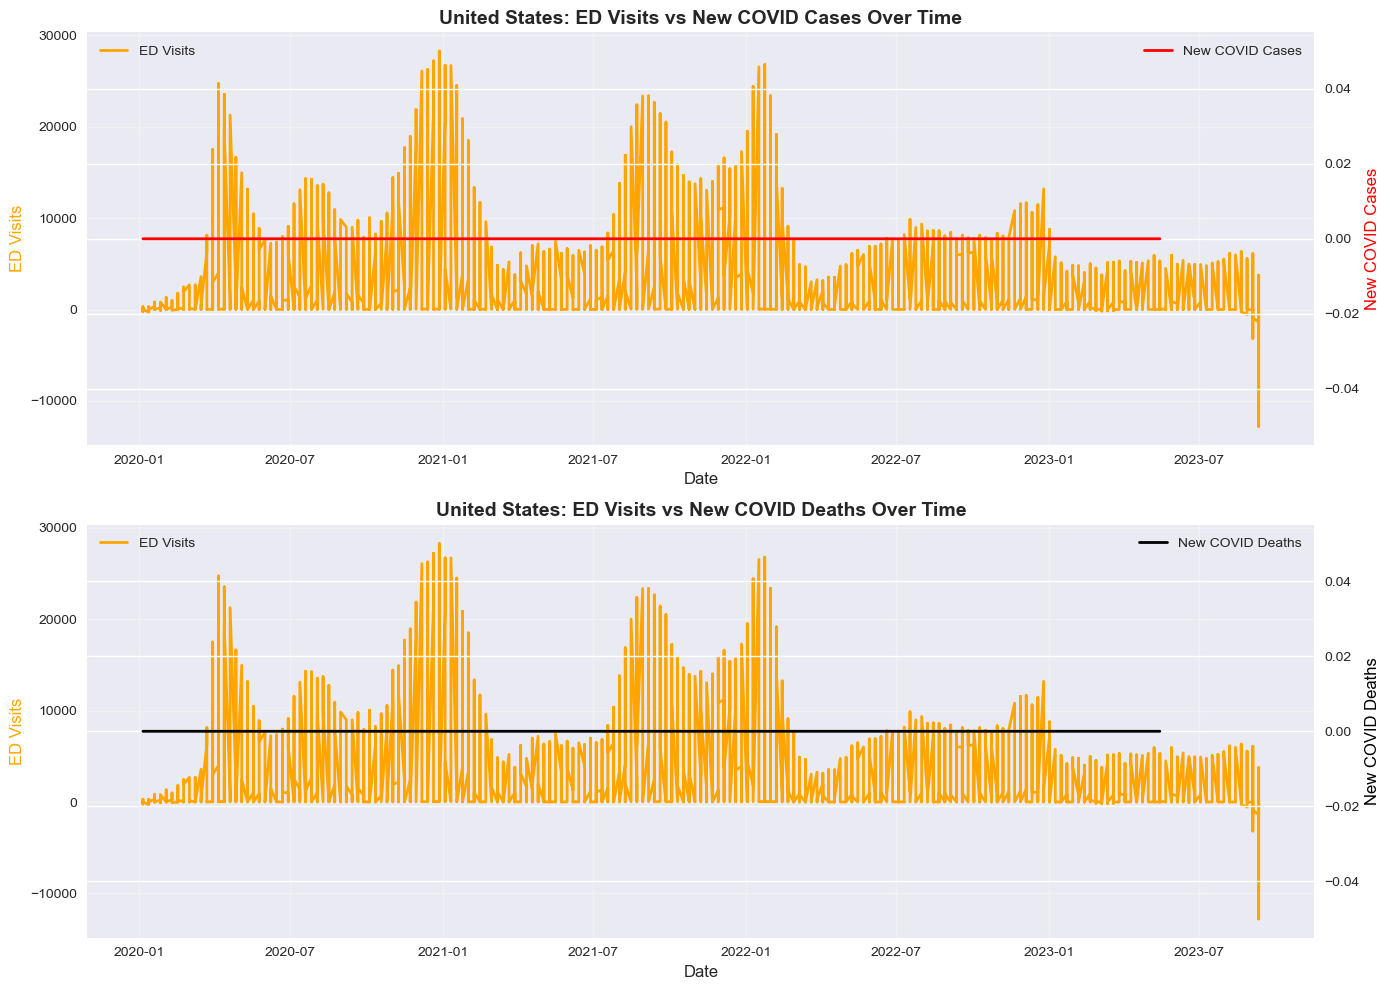

In [31]:
# Time series comparison for a country 
country_to_plot = "United States"
if country_to_plot in merged['country'].unique():
    country_data = merged[merged['country'] == country_to_plot].sort_values('date')
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: ED visits and new COVID cases over time
    ax1 = axes[0]
    ax1.plot(country_data['date'], country_data['value'], label='ED Visits', color='orange', linewidth=2)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(country_data['date'], country_data['new_cases'], label='New COVID Cases', color='red', linewidth=2)
    
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('ED Visits', color='orange', fontsize=12)
    ax1_twin.set_ylabel('New COVID Cases', color='red', fontsize=12)
    ax1.set_title(f'{country_to_plot}: ED Visits vs New COVID Cases Over Time', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')
    
    # Plot 2: ED visits and new COVID deaths
    ax2 = axes[1]
    ax2.plot(country_data['date'], country_data['value'], label='ED Visits', color='orange', linewidth=2)
    ax2_twin = ax2.twinx()
    ax2_twin.plot(country_data['date'], country_data['new_deaths'], label='New COVID Deaths', color='black', linewidth=2)
    
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('ED Visits', color='orange', fontsize=12)
    ax2_twin.set_ylabel('New COVID Deaths', color='black', fontsize=12)
    ax2.set_title(f'{country_to_plot}: ED Visits vs New COVID Deaths Over Time', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"{country_to_plot} not found in merged data")


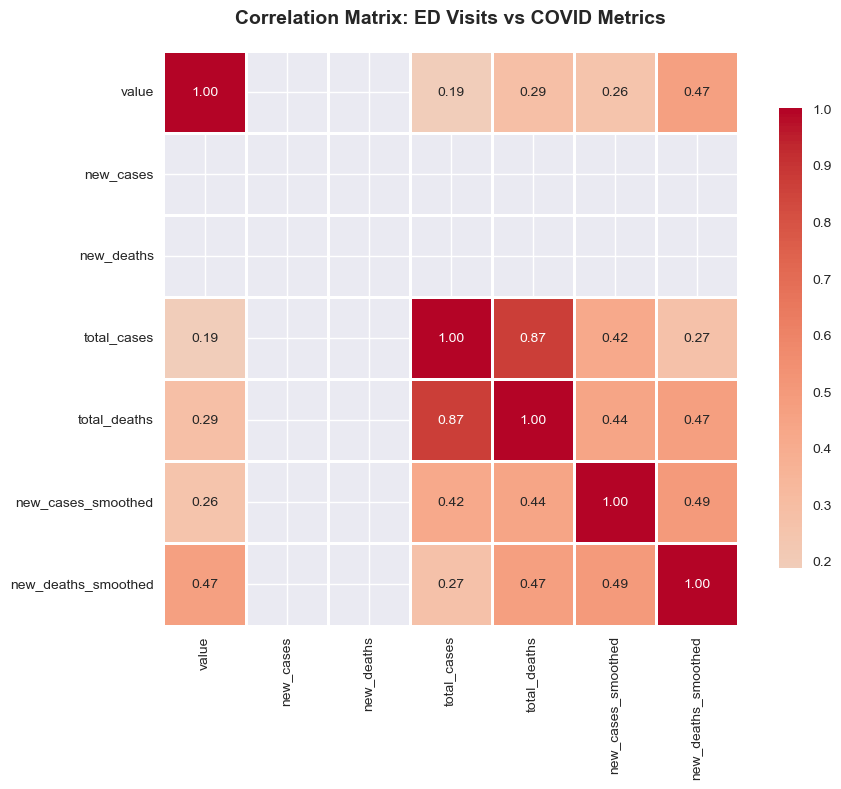


Correlation of ED visits with COVID metrics:
value                  1.000000
new_deaths_smoothed    0.466076
total_deaths           0.286846
new_cases_smoothed     0.259196
total_cases            0.187474
new_cases                   NaN
new_deaths                  NaN
Name: value, dtype: float64


In [32]:
# Correlation analysis between ED visits and COVID metrics
correlation_vars = ['value', 'new_cases', 'new_deaths', 'total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed']

correlation_matrix = merged[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: ED Visits vs COVID Metrics', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation of ED visits with COVID metrics:")
correlations = correlation_matrix['value'].sort_values(ascending=False)
print(correlations)


Comparing top 5 countries by data availability: ['Netherlands', 'Sweden', 'Poland', 'Slovenia', 'Switzerland']


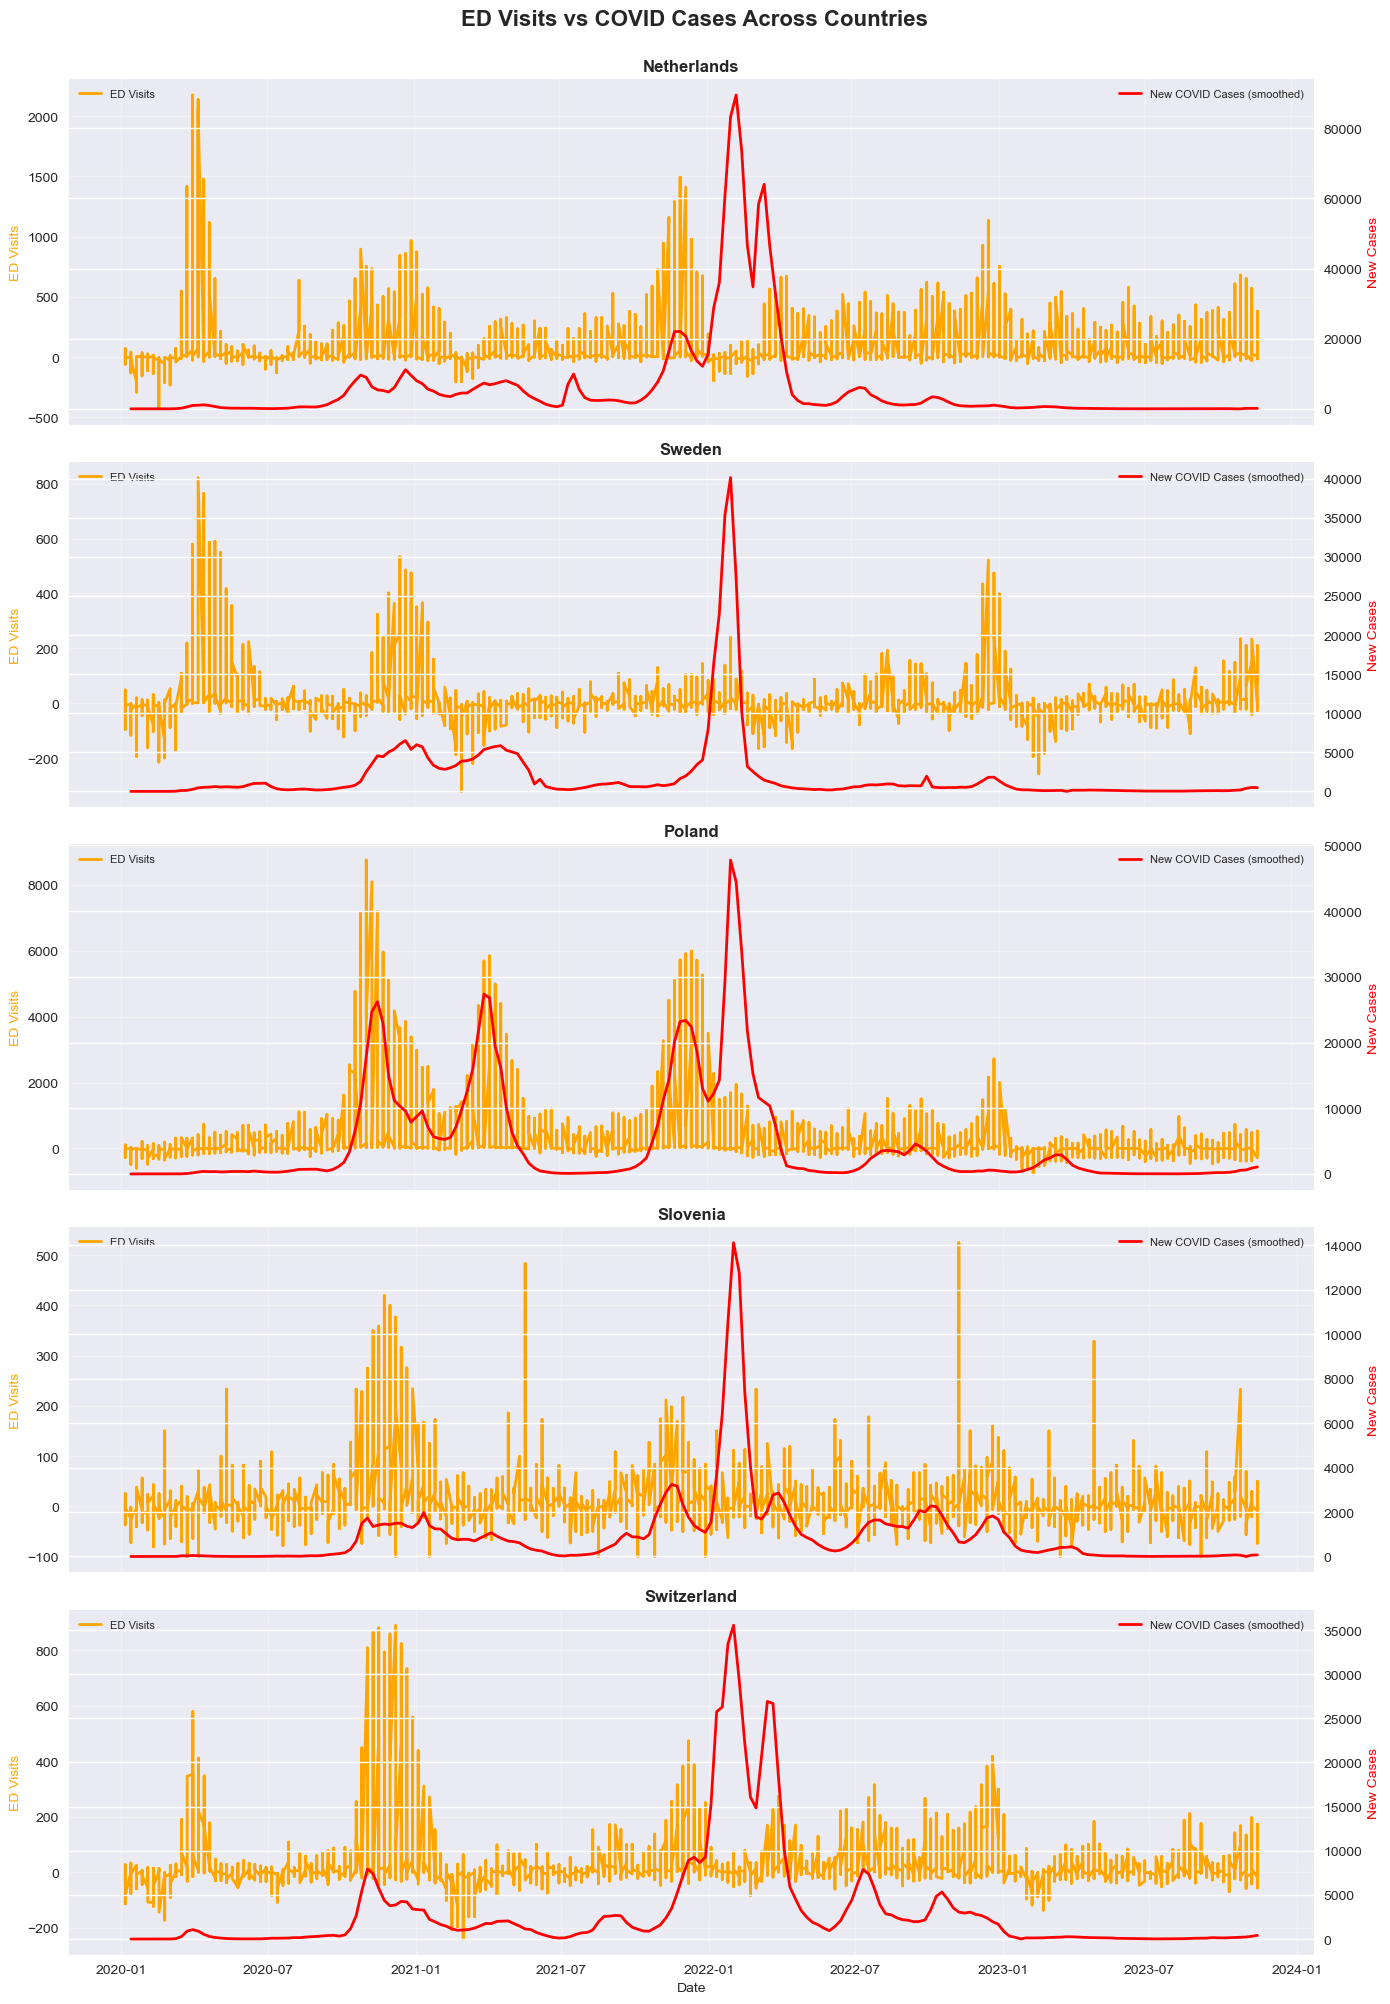

In [33]:
# Compare multiple countries
top_countries = merged['country'].value_counts().head(5).index.tolist()
print(f"Comparing top 5 countries by data availability: {top_countries}")

fig, axes = plt.subplots(len(top_countries), 1, figsize=(14, 4*len(top_countries)))

for idx, country in enumerate(top_countries):
    country_data = merged[merged['country'] == country].sort_values('date')
    
    ax = axes[idx]
    ax.plot(country_data['date'], country_data['value'], label='ED Visits', color='orange', linewidth=2)
    ax_twin = ax.twinx()
    ax_twin.plot(country_data['date'], country_data['new_cases_smoothed'], label='New COVID Cases (smoothed)', color='red', linewidth=2)
    
    ax.set_ylabel('ED Visits', color='orange', fontsize=10)
    ax_twin.set_ylabel('New Cases', color='red', fontsize=10)
    ax.set_title(f'{country}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=8)
    ax_twin.legend(loc='upper right', fontsize=8)
    
    if idx == len(top_countries) - 1:
        ax.set_xlabel('Date', fontsize=10)
    else:
        ax.set_xticklabels([])

plt.suptitle('ED Visits vs COVID Cases Across Countries', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [34]:
vaccine_analysis = merged.groupby('country').agg({
    'total_vaccinations_per_hundred': 'max',
    'people_fully_vaccinated_per_hundred': 'max',
    'value': ['mean', 'std', 'min', 'max'],
    'new_deaths_smoothed': 'mean'
}).round(2)

vaccine_analysis.columns = ['Max_Total_Vax', 'Max_Fully_Vax', 'ED_Mean', 'ED_Std', 'ED_Min', 'ED_Max', 'Avg_Deaths']
vaccine_analysis = vaccine_analysis.sort_values('Max_Fully_Vax', ascending=False)

print("Vaccination Coverage vs Excess Deaths by Country:")
print(vaccine_analysis)


Vaccination Coverage vs Excess Deaths by Country:
                Max_Total_Vax  Max_Fully_Vax  ED_Mean   ED_Std   ED_Min  \
country                                                                   
Chile                  319.76          90.29    87.64   168.58  -1608.6   
Australia              240.46          82.65    51.90   129.37   -234.0   
Canada                 255.81          82.58   147.80   267.35    -97.0   
New Zealand            237.89          82.52    24.63    37.55    -93.2   
Spain                  194.78          82.09   136.46   597.31  -3534.6   
Italy                  244.94          81.21   194.96   710.44  -1759.2   
Belgium                268.13          78.66    23.37   136.30   -529.8   
France                 227.82          78.44   176.76   530.93  -1026.4   
Finland                207.22          76.47    19.13    47.73   -111.4   
Germany                230.55          76.24   425.73  1107.77  -3500.8   
United Kingdom         223.93          75.17   618

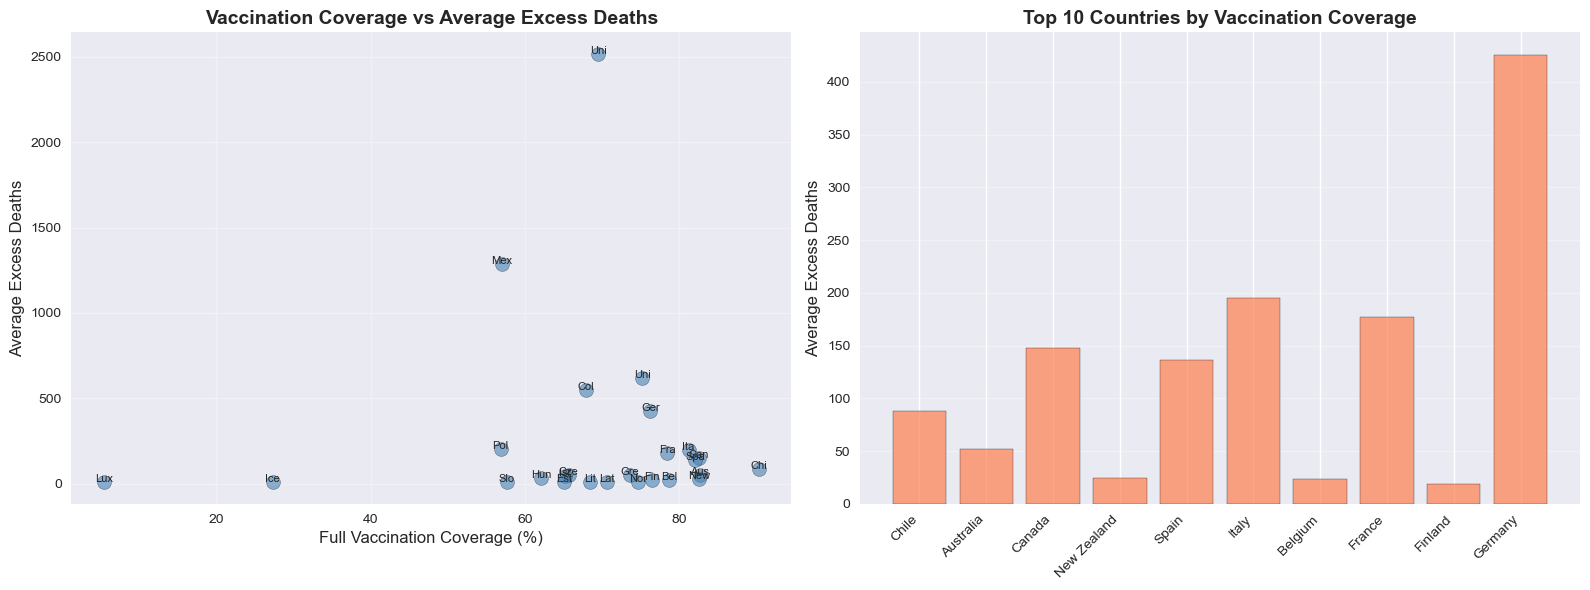

In [35]:
# Visualize vaccination vs excess deaths relationship
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot
ax1 = axes[0]
ax1.scatter(vaccine_analysis['Max_Fully_Vax'], vaccine_analysis['ED_Mean'], 
            s=100, alpha=0.6, c='steelblue', edgecolors='black')
for country in vaccine_analysis.index:
    ax1.annotate(country[:3], (vaccine_analysis.loc[country, 'Max_Fully_Vax'], 
                               vaccine_analysis.loc[country, 'ED_Mean']), 
                fontsize=8, ha='center')
ax1.set_xlabel('Full Vaccination Coverage (%)', fontsize=12)
ax1.set_ylabel('Average Excess Deaths', fontsize=12)
ax1.set_title('Vaccination Coverage vs Average Excess Deaths', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart
ax2 = axes[1]
top_countries = vaccine_analysis.head(10)
bars = ax2.bar(range(len(top_countries)), top_countries['ED_Mean'], 
               color='coral', alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(top_countries)))
ax2.set_xticklabels(top_countries.index, rotation=45, ha='right')
ax2.set_ylabel('Average Excess Deaths', fontsize=12)
ax2.set_title('Top 10 Countries by Vaccination Coverage', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [36]:
# Analyze pandemic phases - identify peaks in excess deaths
def analyze_pandemic_phases(df):
    """Identify different phases of the pandemic based on excess deaths"""
    phases = []
    
    for country in df['country'].unique():
        country_data = df[df['country'] == country].sort_values('date').copy()
        
        # Calculate 4-week rolling average for excess deaths
        country_data['rolling_mean'] = country_data['value'].rolling(window=4, center=True).mean()
        
        # Find peaks (local maxima)
        peaks = []
        for i in range(1, len(country_data) - 1):
            if (country_data.iloc[i]['rolling_mean'] > 
                country_data.iloc[i-1]['rolling_mean'] and 
                country_data.iloc[i]['rolling_mean'] > country_data.iloc[i+1]['rolling_mean']):
                peaks.append(country_data.iloc[i])
        
        # Get first peak date if exists
        if peaks:
            first_peak = peaks[0]
            phases.append({
                'country': country,
                'first_peak_date': first_peak['date'],
                'first_peak_value': first_peak['value'],
                'total_peaks': len(peaks)
            })
    
    return pd.DataFrame(phases)

phases_df = analyze_pandemic_phases(merged)
phases_df = phases_df.sort_values('first_peak_date')
print("Pandemic Peak Analysis:")
print(phases_df.to_string())


Pandemic Peak Analysis:
           country first_peak_date  first_peak_value  total_peaks
0          Czechia      2020-01-06               0.4         1155
31        Colombia      2020-01-06              11.5          255
29        Slovakia      2020-01-06             -48.8         1184
28   United States      2020-01-06             310.0          387
27        Portugal      2020-01-06              -8.4         1180
26         Belgium      2020-01-06              -4.8         1223
25         Germany      2020-01-06               0.1          618
24          Israel      2020-01-06              -4.2          280
23         Estonia      2020-01-06             -15.0         1158
22          Latvia      2020-01-06               8.8         1197
21         Austria      2020-01-06             -24.6         1190
20      Luxembourg      2020-01-06              -1.8         1169
19     Switzerland      2020-01-06               9.9         1186
17         Denmark      2020-01-06               1.4

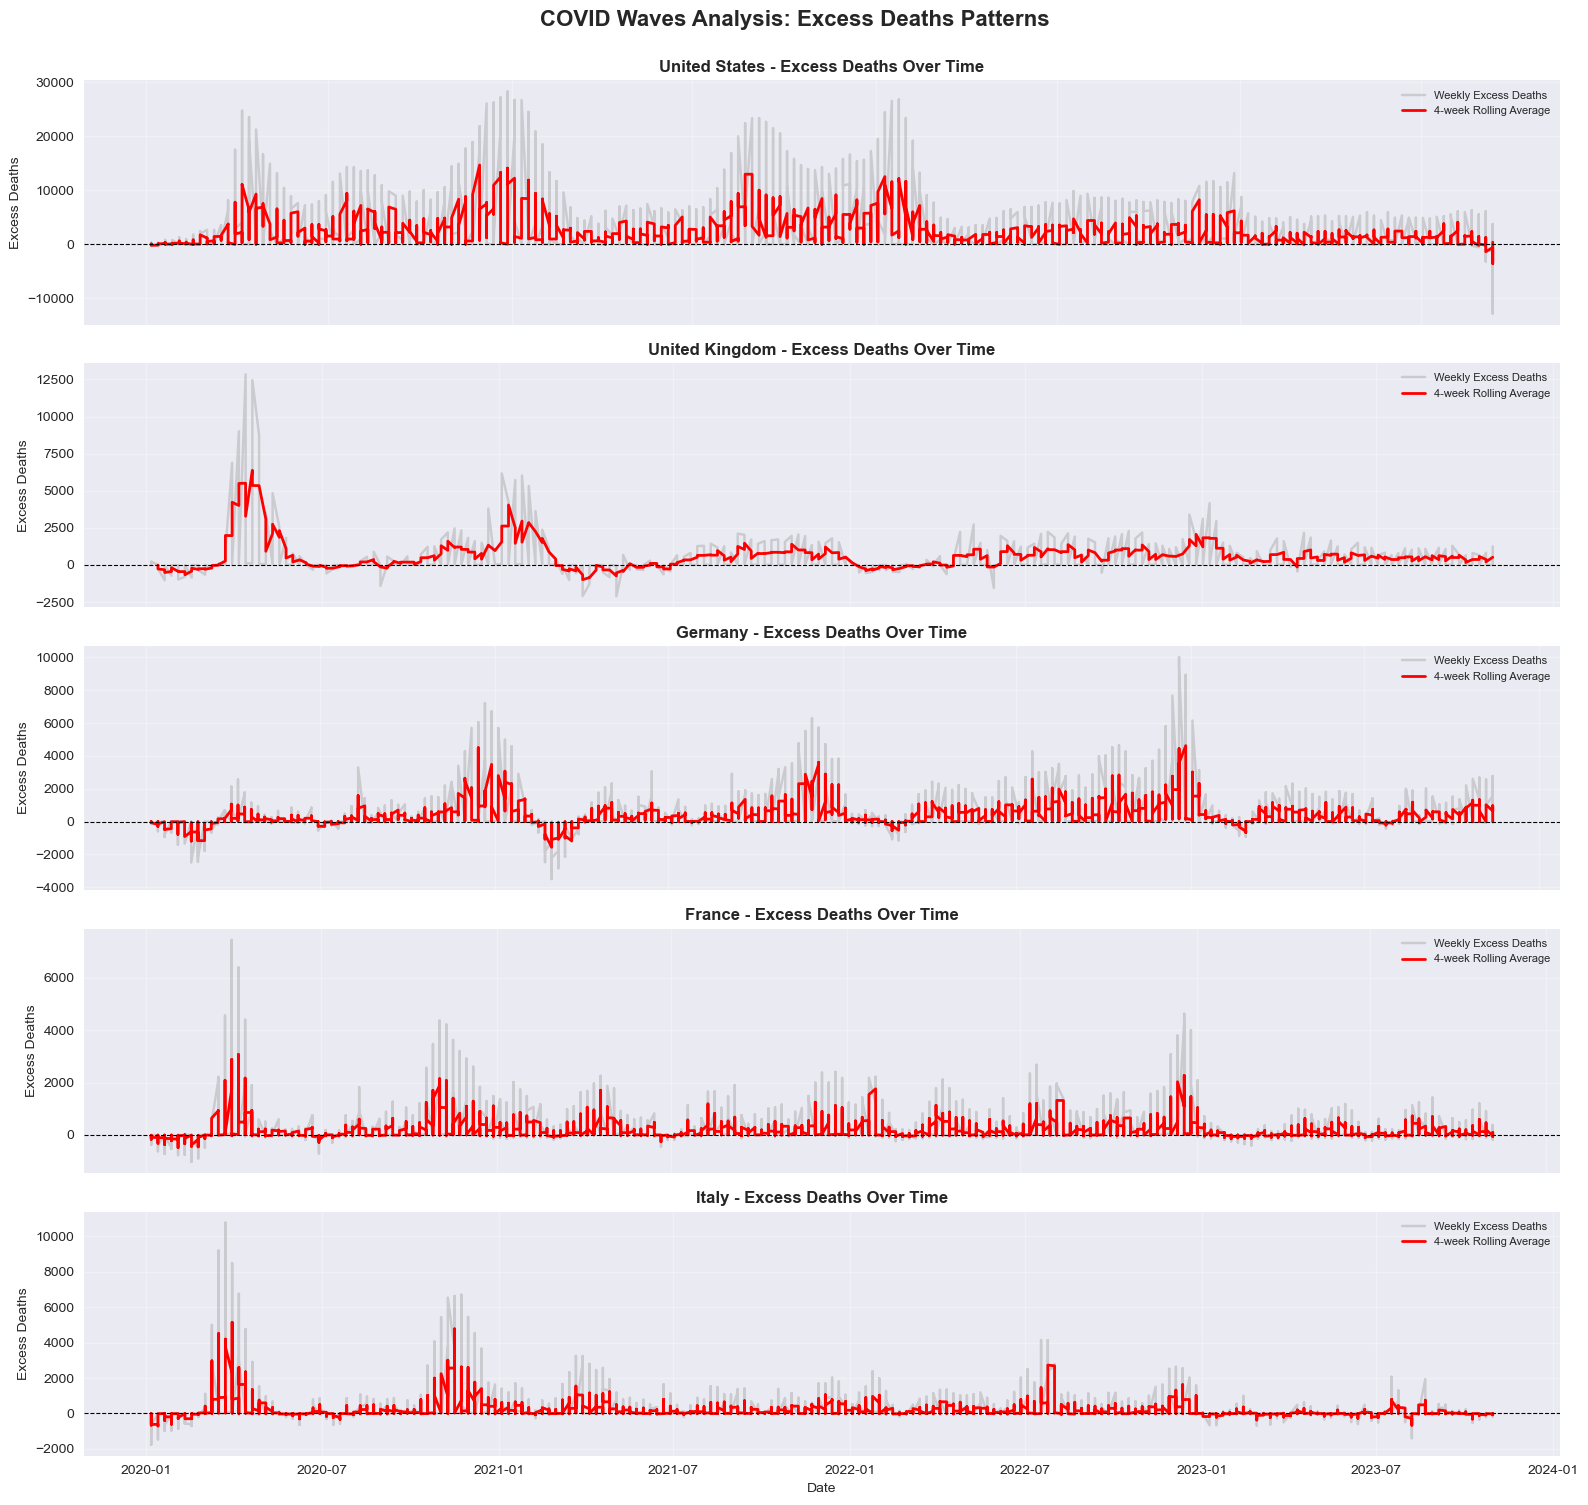

In [37]:
# Identify COVID waves based on excess deaths for top countries
countries_to_analyze = ['United States', 'United Kingdom', 'Germany', 'France', 'Italy']

fig, axes = plt.subplots(len(countries_to_analyze), 1, figsize=(16, 3*len(countries_to_analyze)))

for idx, country in enumerate(countries_to_analyze):
    country_data = merged[merged['country'] == country].sort_values('date').copy()
    
    # Calculate rolling average
    country_data['rolling_avg'] = country_data['value'].rolling(window=4, center=True).mean()
    
    ax = axes[idx]
    ax.plot(country_data['date'], country_data['value'], alpha=0.3, color='gray', label='Weekly Excess Deaths')
    ax.plot(country_data['date'], country_data['rolling_avg'], linewidth=2, color='red', label='4-week Rolling Average')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    
    ax.set_title(f'{country} - Excess Deaths Over Time', fontsize=12, fontweight='bold')
    ax.set_ylabel('Excess Deaths', fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    if idx == len(countries_to_analyze) - 1:
        ax.set_xlabel('Date', fontsize=10)
    else:
        ax.set_xticklabels([])

plt.suptitle('COVID Waves Analysis: Excess Deaths Patterns', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


In [38]:
print("Age groups in ED data:")
print(ed['age'].value_counts())
print("\nGender breakdown in ED data:")
print(ed['gender'].value_counts())
print("\nVariable types in ED data:")
print(ed['variable'].value_counts())


Age groups in ED data:
age
TOTAL     37460
Y_GE65    32762
Y45T64    32758
Y0T44     32648
Name: count, dtype: int64

Gender breakdown in ED data:
gender
TOTAL     47378
MALE      44146
FEMALE    44104
Name: count, dtype: int64

Variable types in ED data:
variable
EXCESSNB    67824
EXCESSPC    67804
Name: count, dtype: int64


Comparison of Excess Deaths: Pre-Vaccine vs Post-Vaccine
period          Post-Vaccine (2021+)  Pre-Vaccine (2020-2021)
country                                                      
United States            2331.486239              2816.981250
Mexico                   1088.478472              1367.840541
United Kingdom            555.209127               726.108108
Colombia                  455.181609               661.114865
Poland                    141.304304               311.552815
Italy                     130.569015               304.587725
Germany                   529.007050               247.560023
France                    162.290873               201.582939
Spain                     107.232421               185.128998
Canada                    178.292141                99.516104
Chile                      82.734722                95.605518
Czechia                    24.554100                91.379561
Hungary                    20.301051                56.208727
Netherlands  

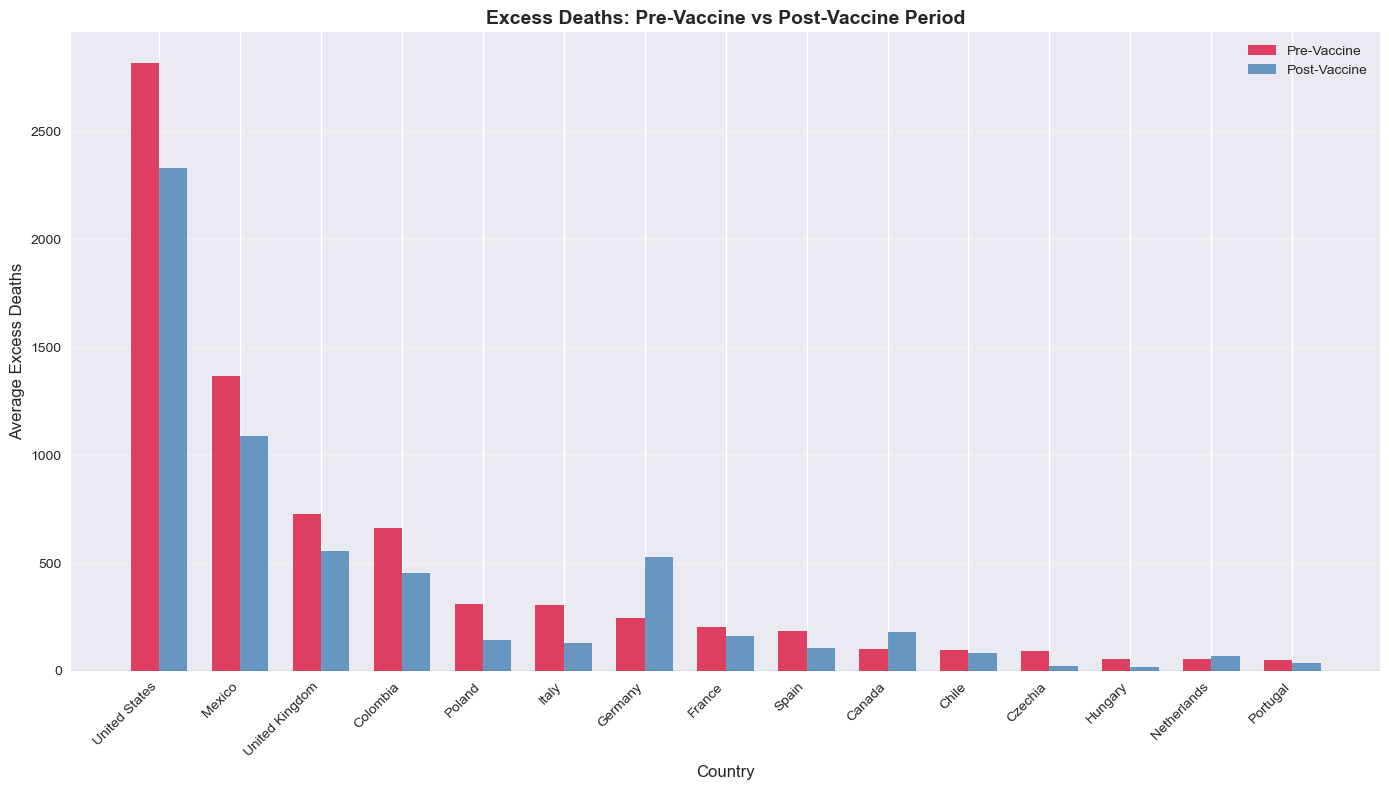

In [39]:
# Compare pre-vaccine vs post-vaccine period
# Define vaccine rollout as mid-2021 (June 2021)
merged['period'] = merged['date'].apply(lambda x: 'Pre-Vaccine (2020-2021)' 
                                           if x < pd.Timestamp('2021-06-01') 
                                           else 'Post-Vaccine (2021+)')

# Compare by country
period_comparison = merged.groupby(['country', 'period'])['value'].mean().unstack()

print("Comparison of Excess Deaths: Pre-Vaccine vs Post-Vaccine")
print("="*60)
print(period_comparison.sort_values('Pre-Vaccine (2020-2021)', ascending=False))

# Visualize
fig, axes = plt.subplots(1, 1, figsize=(14, 8))

# Select top 15 countries for visualization
top_countries = period_comparison.sort_values('Pre-Vaccine (2020-2021)', ascending=False).head(15)

x = range(len(top_countries))
width = 0.35

axes.bar([i - width/2 for i in x], top_countries['Pre-Vaccine (2020-2021)'], 
         width, label='Pre-Vaccine', alpha=0.8, color='crimson')
axes.bar([i + width/2 for i in x], top_countries['Post-Vaccine (2021+)'], 
         width, label='Post-Vaccine', alpha=0.8, color='steelblue')

axes.set_xlabel('Country', fontsize=12)
axes.set_ylabel('Average Excess Deaths', fontsize=12)
axes.set_title('Excess Deaths: Pre-Vaccine vs Post-Vaccine Period', fontsize=14, fontweight='bold')
axes.set_xticks(x)
axes.set_xticklabels(top_countries.index, rotation=45, ha='right')
axes.legend()
axes.grid(True, alpha=0.3, axis='y')
axes.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()


In [40]:
summary_stats = pd.DataFrame({
    'Country': merged['country'].unique(),
})

for country in summary_stats['Country']:
    country_data = merged[merged['country'] == country]
    
    # Calculate key metrics
    summary_stats.loc[summary_stats['Country'] == country, 'Total_Records'] = len(country_data)
    summary_stats.loc[summary_stats['Country'] == country, 'Avg_Excess_Deaths'] = round(country_data['value'].mean(), 2)
    summary_stats.loc[summary_stats['Country'] == country, 'Max_Excess_Deaths'] = round(country_data['value'].max(), 2)
    summary_stats.loc[summary_stats['Country'] == country, 'Max_Vaccination_Coverage'] = round(country_data['people_fully_vaccinated_per_hundred'].max(), 2)

summary_stats = summary_stats.sort_values('Avg_Excess_Deaths', ascending=False)

print("="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print(f"\nTotal countries analyzed: {len(summary_stats)}")
print(f"Total records: {len(merged):,}")
print(f"Date range: {merged['date'].min().strftime('%Y-%m-%d')} to {merged['date'].max().strftime('%Y-%m-%d')}")
print(f"\nTop 5 countries by average excess deaths:")
print(summary_stats.head().to_string(index=False))
print(f"\nCountries with highest vaccination coverage:")
print(summary_stats.nlargest(5, 'Max_Vaccination_Coverage')[['Country', 'Max_Vaccination_Coverage', 'Avg_Excess_Deaths']].to_string(index=False))


SUMMARY OF FINDINGS

Total countries analyzed: 34
Total records: 134,938
Date range: 2020-01-06 to 2023-12-04

Top 5 countries by average excess deaths:
       Country  Total_Records  Avg_Excess_Deaths  Max_Excess_Deaths  Max_Vaccination_Coverage
 United States         1544.0            2517.63            28262.9                     69.47
        Mexico         2496.0            1287.26            26889.2                     57.01
United Kingdom          400.0             618.44            12840.4                     75.17
      Colombia          966.0             549.83             6050.4                     67.88
       Germany         2420.0             425.73            10014.8                     76.24

Countries with highest vaccination coverage:
    Country  Max_Vaccination_Coverage  Avg_Excess_Deaths
      Chile                     90.29              87.64
  Australia                     82.65              51.90
     Canada                     82.58             147.80
New Zeala

In [41]:
merged.to_csv('/Users/apple/Downloads/Covid_19/merged_covid_excess_deaths.csv', index=False)
print("✓ Exported merged dataset")


summary_stats.to_csv('/Users/apple/Downloads/Covid_19/summary_statistics.csv', index=False)
print("✓ Exported summary statistics")

vaccine_analysis.to_csv('/Users/apple/Downloads/Covid_19/vaccination_analysis.csv')
print("✓ Exported vaccination analysis")


phases_df.to_csv('/Users/apple/Downloads/Covid_19/pandemic_phases.csv', index=False)
print("✓ Exported pandemic phases analysis")

print("\n" + "="*80)
print("Analysis complete! All results saved to CSV files.")
print("="*80)


✓ Exported merged dataset
✓ Exported summary statistics
✓ Exported vaccination analysis
✓ Exported pandemic phases analysis

Analysis complete! All results saved to CSV files.
